LIBRARY INSTALLATION

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim.downloader as api
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')


LOAD DATASET

In [5]:
df = pd.read_csv('IMDB Dataset.csv')

EXPLORATION OF DATASET

Dataset Shape: (50000, 2)

Dataset Info:

Sample Data:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


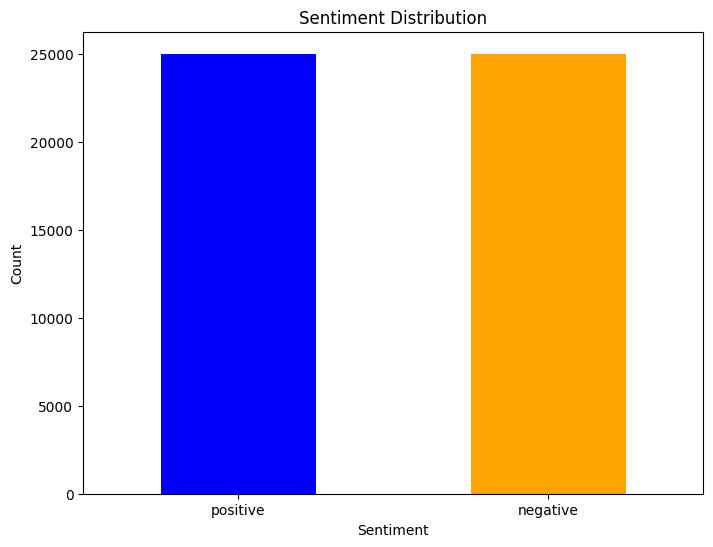

In [6]:
# Plot sentiment distribution
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print("\nSample Data:")
print(df.head())
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



In [7]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
sample_review = df['review'][0]
print("Original Review:\n", sample_review[:200], "...\n")
print("Cleaned Review:\n", clean_text(sample_review)[:200], "...")


Original Review:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo ...

Cleaned Review:
 one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brut ...


TOKENIZATION

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
def preprocess_text(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens
tokens = preprocess_text(sample_review)
print("Tokenized & Stopwords Removed:\n", tokens[:20], "...")


Tokenized & Stopwords Removed:
 ['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence'] ...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nlp = spacy.load('en_core_web_sm')

def analyze_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    return pos_tags[:20], entities[:5]
pos_tags, entities = analyze_text(sample_review)
print("POS Tags (first 20):\n", pos_tags)
print("\nNamed Entities (first 5):\n", entities)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


POS Tags (first 20):
 [('One', 'CD'), ('of', 'IN'), ('the', 'DT'), ('other', 'JJ'), ('reviewers', 'NNS'), ('has', 'VBZ'), ('mentioned', 'VBN'), ('that', 'IN'), ('after', 'IN'), ('watching', 'VBG'), ('just', 'RB'), ('1', 'CD'), ('Oz', 'NNP'), ('episode', 'NN'), ('you', 'PRP'), ("'ll", 'MD'), ('be', 'VB'), ('hooked', 'VBN'), ('.', '.'), ('They', 'PRP')]

Named Entities (first 5):
 [('One', 'CARDINAL'), ('just 1 Oz', 'PERCENT'), ('the Oswald Maximum Security State Penitentary', 'ORG'), ('Emerald City', 'GPE'), ('Aryans', 'NORP')]


STEMMING&LEMMATIZATION

In [10]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
def stem_and_lemmatize(tokens):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    stemmed = [stemmer.stem(token) for token in tokens]
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]

    return stemmed, lemmatized
sample_tokens = tokens[:10]
stemmed, lemmatized = stem_and_lemmatize(sample_tokens)

print("Original Tokens:\n", sample_tokens)
print("\nStemmed:\n", stemmed)
print("\nLemmatized:\n", lemmatized)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Original Tokens:
 ['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly']

Stemmed:
 ['one', 'review', 'mention', 'watch', 'oz', 'episod', 'youll', 'hook', 'right', 'exactli']

Lemmatized:
 ['one', 'reviewer', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly']


TEXT REPRESENTATION

In [2]:
import gensim.downloader as api
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
word2vec_model = api.load('word2vec-google-news-300')
def compare_word_similarities(model, word_pairs):
    print("\n Word Similarity Comparison:")
    print("=" * 50)
    for word1, word2 in word_pairs:
        try:
            similarity = model.similarity(word1, word2)
            category = "High" if similarity > 0.6 else "Moderate" if similarity > 0.3 else "Low"
            print(f"🔹 Similarity between '{word1}' & '{word2}': {similarity:.3f} ({category} similarity)")
        except KeyError:
            print(f" '{word1}' or '{word2}' not in vocabulary")
    print("=" * 50)
related_pairs = [('king', 'queen'), ('france', 'paris'), ('computer', 'laptop')]
context_pairs = [('breakfast', 'dinner'), ('happy', 'sad'), ('buy', 'sell')]
unrelated_pairs = [('pizza', 'computer'), ('sunshine', 'algebra'), ('elephant', 'guitar')]
compare_word_similarities(word2vec_model, related_pairs)
compare_word_similarities(word2vec_model, context_pairs)
compare_word_similarities(word2vec_model, unrelated_pairs)
print("\n BoW vs. TF-IDF Representation:")
example_text = ["This movie was great! I really loved the amazing acting and brilliant story"]
bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(example_text)
bow_dict = dict(zip(bow_vectorizer.get_feature_names_out(), bow_features.toarray()[0]))
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(example_text)
tfidf_dict = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_features.toarray()[0]))
print("\n🔹 Bag of Words (Word Counts):")
for word, count in sorted(bow_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"'{word}': {int(count)} occurrences")

print("\n🔹 TF-IDF (Term Importance):")
for word, score in sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"'{word}': {score:.3f} importance score")



 Word Similarity Comparison:
🔹 Similarity between 'king' & 'queen': 0.651 (High similarity)
🔹 Similarity between 'france' & 'paris': 0.555 (Moderate similarity)
🔹 Similarity between 'computer' & 'laptop': 0.664 (High similarity)

 Word Similarity Comparison:
🔹 Similarity between 'breakfast' & 'dinner': 0.701 (High similarity)
🔹 Similarity between 'happy' & 'sad': 0.535 (Moderate similarity)
🔹 Similarity between 'buy' & 'sell': 0.831 (High similarity)

 Word Similarity Comparison:
🔹 Similarity between 'pizza' & 'computer': 0.158 (Low similarity)
🔹 Similarity between 'sunshine' & 'algebra': 0.041 (Low similarity)
🔹 Similarity between 'elephant' & 'guitar': 0.031 (Low similarity)

 BoW vs. TF-IDF Representation:

🔹 Bag of Words (Word Counts):
'acting': 1 occurrences
'amazing': 1 occurrences
'and': 1 occurrences
'brilliant': 1 occurrences
'great': 1 occurrences
'loved': 1 occurrences
'movie': 1 occurrences
'really': 1 occurrences
'story': 1 occurrences
'the': 1 occurrences
'this': 1 occur

IMPLEMENTATION USING MACHINE LEARNING

In [11]:
from tqdm import tqdm
tqdm.pandas()
df['processed_text'] = df['review'].progress_apply(preprocess_text)

df['processed_text'] = df['processed_text'].apply(lambda tokens: ' '.join(tokens))



100%|██████████| 50000/50000 [00:56<00:00, 877.43it/s]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
def create_evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    """Train and evaluate a model with detailed metrics."""
    print(f"\n Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'name': model_name,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': conf_matrix
    }


In [13]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['processed_text'])
y = (df['sentiment'] == 'positive').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}
ml_results = []
for name, model in models.items():
    result = create_evaluate_model(name, model, X_train, X_test, y_train, y_test)
    ml_results.append(result)
for result in ml_results:
    print(f"\n{result['name']} Results:")
    print(f"Accuracy: {result['accuracy']:.3f}")
    print(f"Classification Report:\n{result['report']}")


 Training Logistic Regression...

 Training Naive Bayes...

 Training SVM...

 Training Random Forest...

Logistic Regression Results:
Accuracy: 0.887
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Naive Bayes Results:
Accuracy: 0.849
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


SVM Results:
Accuracy: 0.879
Classification Report:
              precision    recall  f1-score   support

  

CONFUSION MATRIX

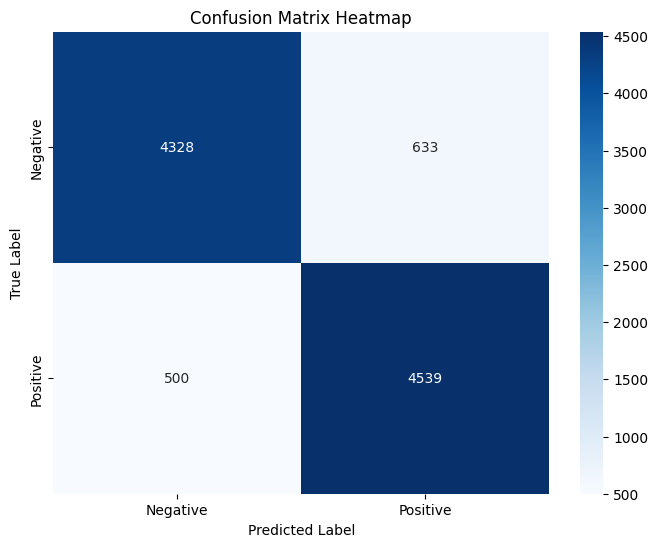

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix Heatmap")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
model = models['Logistic Regression']
y_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=['Negative', 'Positive'])

ROC CURVE

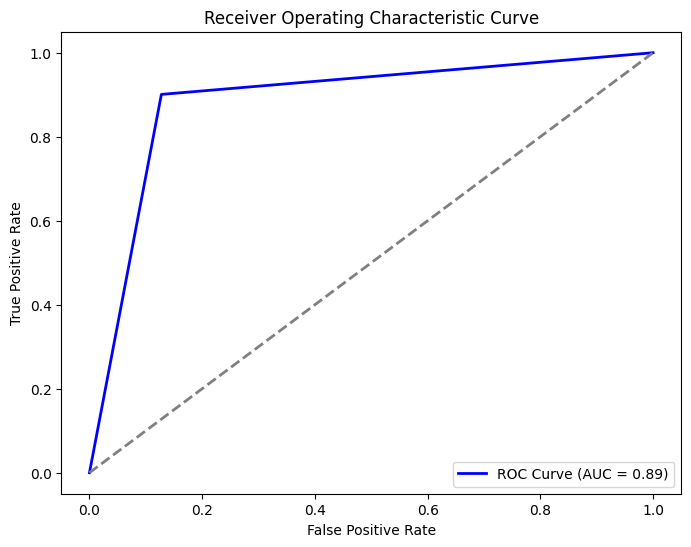

In [18]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, auc_score):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.title('Receiver Operating Characteristic Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)


PRECISION-RECALL CURVE

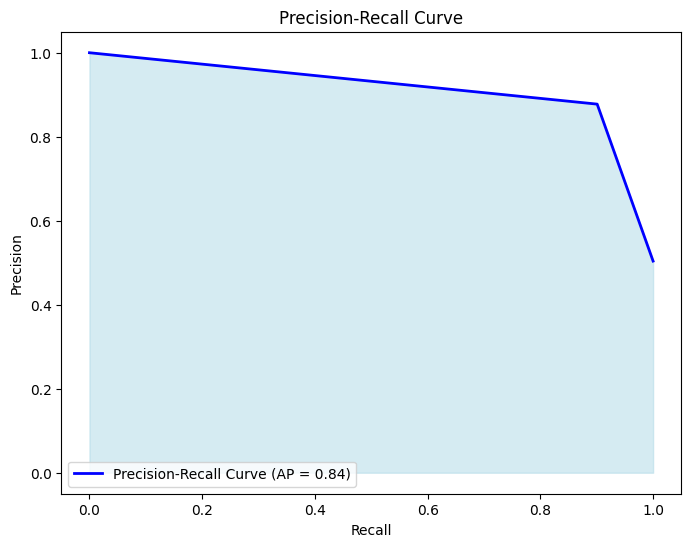

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_precision_recall_curve(precision, recall, average_precision):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
    plt.fill_between(recall, precision, color='lightblue', alpha=0.5)
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.show()
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plot_precision_recall_curve(precision, recall, average_precision)

ACCURACY VS MODEL

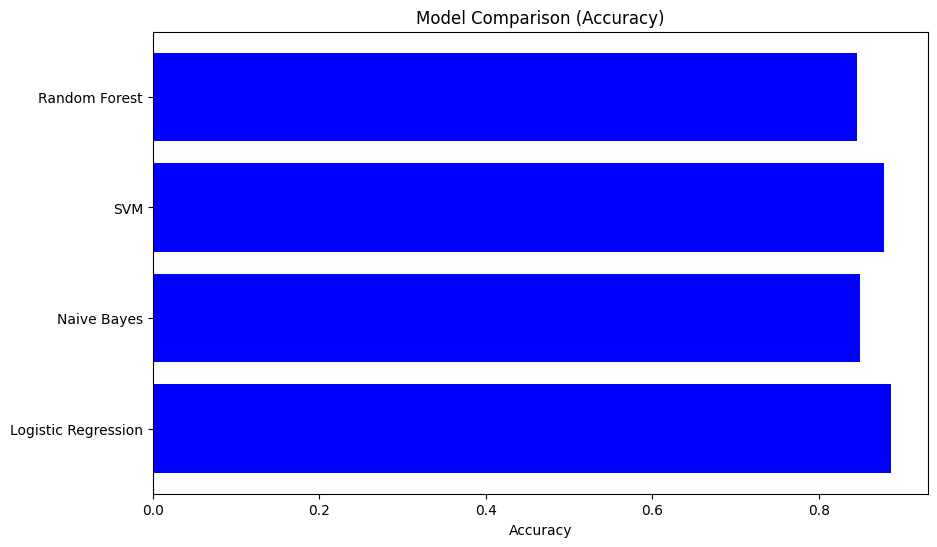

In [22]:
def plot_model_comparison(results):
    model_names = [result['name'] for result in results]
    accuracies = [result['accuracy'] for result in results]

    plt.figure(figsize=(10, 6))
    plt.barh(model_names, accuracies, color='blue')
    plt.xlabel('Accuracy')
    plt.title('Model Comparison (Accuracy)')
    plt.show()
plot_model_comparison(ml_results)


WORD CLOUD

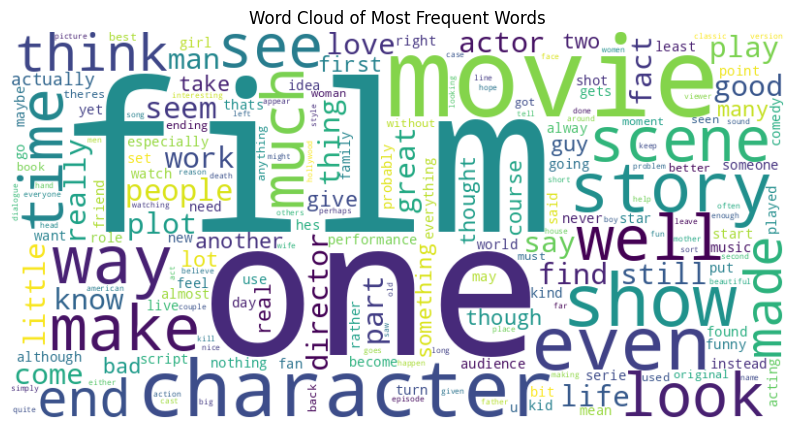

In [23]:
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Most Frequent Words")
    plt.show()
plot_word_cloud(df['processed_text'])
